# Exploratory Data Analysis of Zillow Data Set

The data:

* properties_2017.csv is a sample of all properties from 2017 listed on Zillow through Sept
* train_2017.csv contains dates, propertyids, and logerror for each transaction in 2017 through Sept
* The same files are available for 2016 (entire year)
* Not all properties have transactions
* logerror=log(Zestimate)−log(SalePrice)

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [6]:
df17 = pd.read_csv('properties_2017.csv', low_memory=False)
df_transactions17 = pd.read_csv('train_2017.csv', low_memory=False)
df_merged17 = pd.merge(df17, df_transactions17, on='parcelid', how='right')

In [5]:
df16 = pd.read_csv('properties_2016.csv', low_memory=False)
df_transactions16 = pd.read_csv('train_2016_v2.csv', low_memory=False)
df_merged16 = pd.merge(df16, df_transactions16, on='parcelid', how='right')

In [7]:
df_merged17['latitude'] = df_merged17['latitude'] / 1000000
df_merged17['longitude'] = df_merged17['longitude'] / 1000000
df_merged16['latitude'] = df_merged16['latitude'] / 1000000
df_merged16['longitude'] = df_merged16['longitude'] / 1000000

In [8]:
df_merged17['taxdelinquencyyear'].describe()

count    2900.000000
mean       14.088276
std         2.181281
min         3.000000
25%        14.000000
50%        15.000000
75%        15.000000
max        99.000000
Name: taxdelinquencyyear, dtype: float64

In [9]:
def convertyears(x):
    if x > 9 and x < 20:
        t = '20' + str(x)
        return float(t)
    elif x <= 9:
        t = '200' + str(x)
        return float(t)
    elif x > 20:
        t = '19' + str(x)
        return float(t)
    else:
        return np.nan
    


df_merged17['taxdelinquencyyear'] = df_merged17['taxdelinquencyyear'].map(lambda a: convertyears(a))
df_merged16['taxdelinquencyyear'] = df_merged16['taxdelinquencyyear'].map(lambda a: convertyears(a))

In [10]:
df_merged16['taxdelinquencyyear'].describe()

count    1783.000000
mean     2013.346607
std         1.837964
min      1999.000000
25%      2013.000000
50%      2014.000000
75%      2015.000000
max      2015.000000
Name: taxdelinquencyyear, dtype: float64

In [11]:
import datetime
format = '%Y-%m-%d'
df_merged16['transactiondate'] = df_merged16['transactiondate'].map(lambda a: datetime.datetime.strptime(a, format))
df_merged17['transactiondate'] = df_merged17['transactiondate'].map(lambda a: datetime.datetime.strptime(a, format))

df_merged16['SetYear'] = 2016
df_merged17['SetYear'] = 2017
df_total = df_merged16.append(df_merged17, ignore_index=True)

### Heat map of correlations


In [12]:
df_total['logerror'].describe()

count    167888.000000
mean          0.013906
std           0.165706
min          -4.655420
25%          -0.025300
50%           0.006000
75%           0.039200
max           5.262999
Name: logerror, dtype: float64

In [13]:
#Select the columns which have numerical data
numerical = ['bathroomcnt','bedroomcnt','buildingqualitytypeid','calculatedbathnbr',
             'calculatedfinishedsquarefeet','finishedsquarefeet12',
             'fireplacecnt','fullbathcnt','garagecarcnt','garagetotalsqft','latitude','longitude',
             'lotsizesquarefeet','poolcnt','roomcnt','unitcnt','yearbuilt','numberofstories','structuretaxvaluedollarcnt','taxvaluedollarcnt','assessmentyear','landtaxvaluedollarcnt','taxamount',
             'taxdelinquencyyear','logerror']

In [33]:
#Select columns which have categorical data
categorical=['airconditioningtypeid','fips','heatingorsystemtypeid','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc',
             'rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood','regionidzip','taxdelinquencyflag','censustractandblock',
             'logerror']
categorical_airconditioningtypeid=['airconditioningtypeid','fips','logerror']
categorical_heatingorsystemtypeid=['heatingorsystemtypeid','fips','logerror']
categorical_propertycountylandusecode=['propertycountylandusecode','fips','logerror']
categorical_propertylandusetypeid=['propertylandusetypeid','fips','logerror']
categorical_propertyzoningdesc=['propertyzoningdesc','fips','logerror']
categorical_rawcensustractandblock=['rawcensustractandblock','fips','logerror']
categorical_taxdelinquencyflag=['taxdelinquencyflag','fips','logerror']
categorical_censustractandblock=['censustractandblock','fips','logerror']

In [38]:
df_cat=df_total[categorical]
df_airconditioningtypeid=df_total[categorical_airconditioningtypeid]
df_heatingorsystemtypeid=df_total[categorical_heatingorsystemtypeid]
df_propertycountylandusecode=df_total[categorical_propertycountylandusecode]
df_propertylandusetypeid=df_total[categorical_propertylandusetypeid]
df_propertyzoningdesc=df_total[categorical_propertyzoningdesc]
df_rawcensustractandblock=df_total[categorical_rawcensustractandblock]
df_taxdelinquencyflag=df_total[categorical_taxdelinquencyflag]
df_censustractandblock=df_total[categorical_censustractandblock]

In [39]:
df_num=df_total[numerical]

### Correlation of numerical data

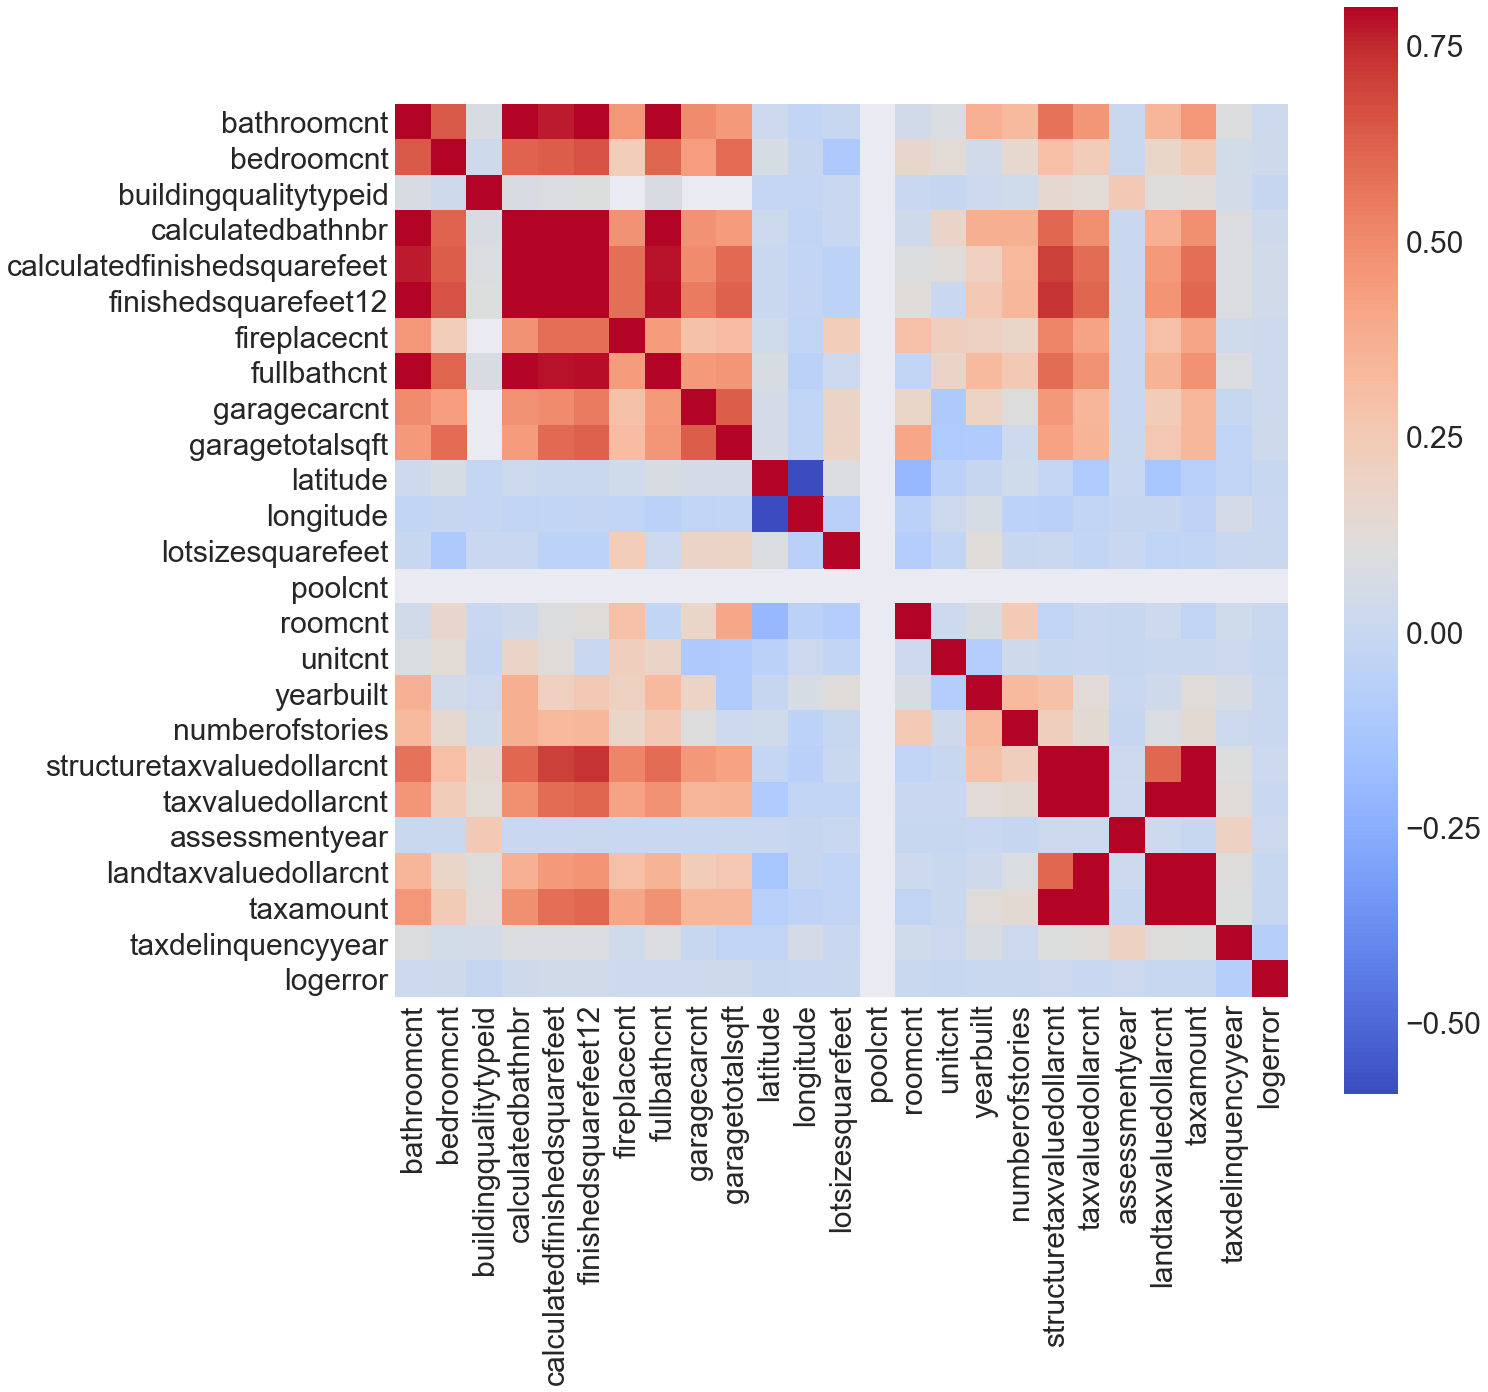

In [40]:
plt.close('all')
plt.figure(figsize=(20,20))
sns.heatmap(df_total[numerical].corr(), vmax=.8, square=True, cmap=cm.coolwarm)
plt.show()

### Distribution of categorical data by County

In [19]:
#melted_df=pd.melt(df_cat1,id_vars=['logerror','fips'],var_name='Categorical data')

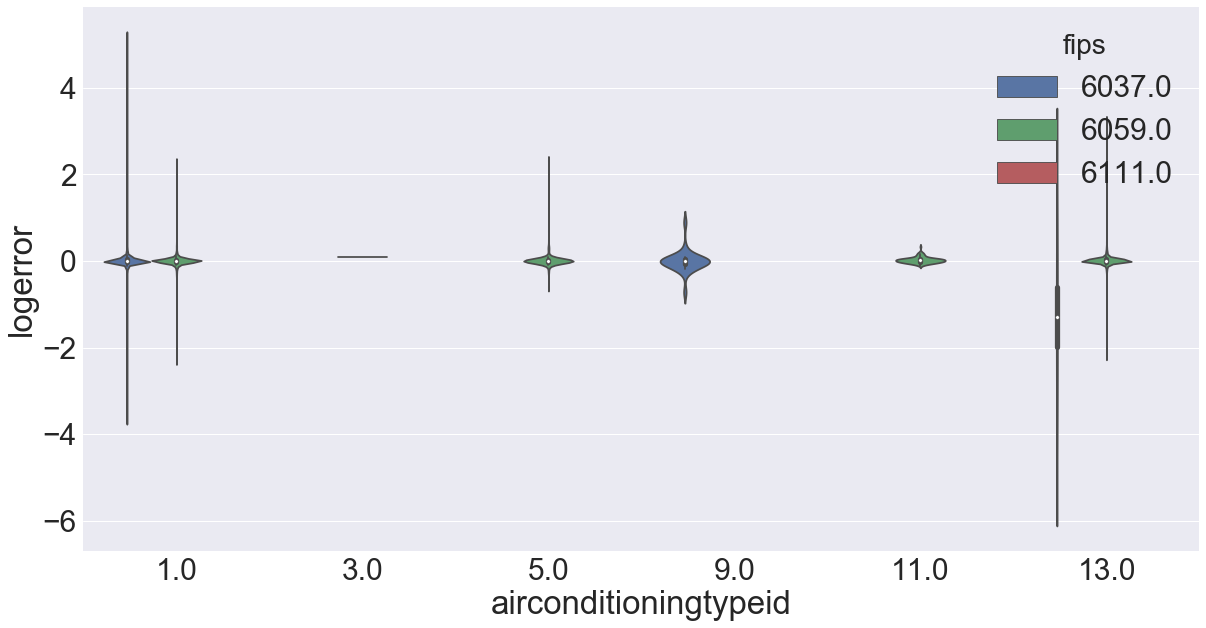

In [41]:
plt.close('all')
plt.figure(figsize=(20,10))
sns.set(font_scale = 3)
sns.violinplot(x='airconditioningtypeid', y='logerror', data=df_airconditioningtypeid, hue='fips',size=1)
plt.show()

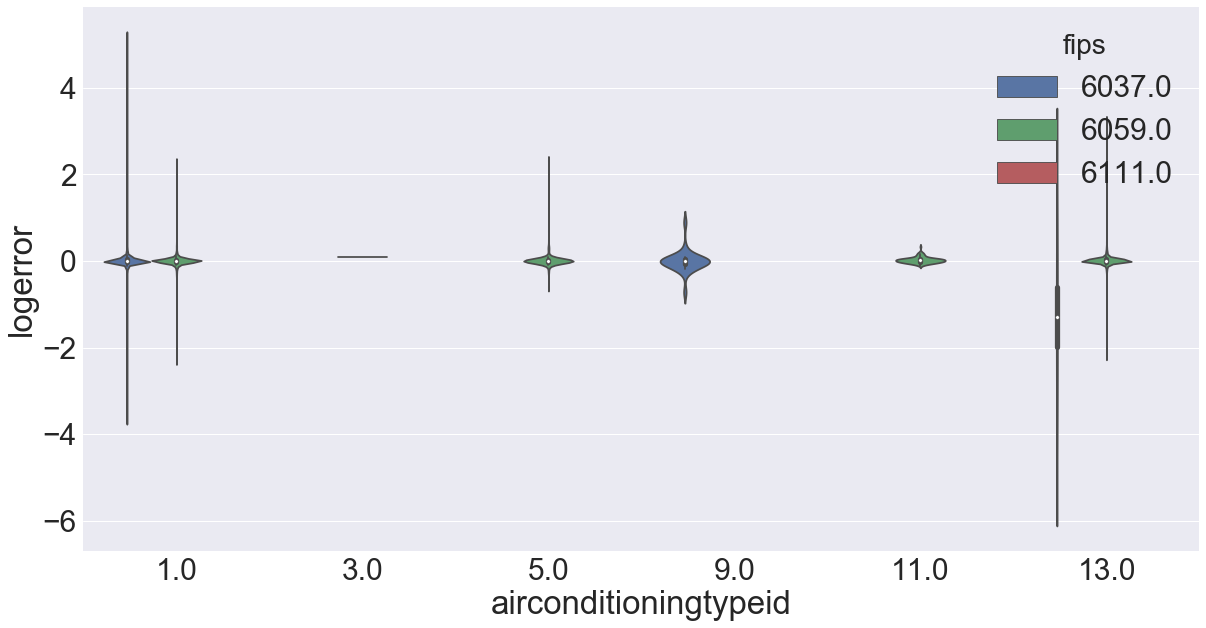

In [42]:
plt.close('all')
plt.figure(figsize=(20,10))
sns.set(font_scale = 3)
sns.violinplot(x='airconditioningtypeid', y='logerror', data=df_airconditioningtypeid, hue='fips',size=1)
plt.show()

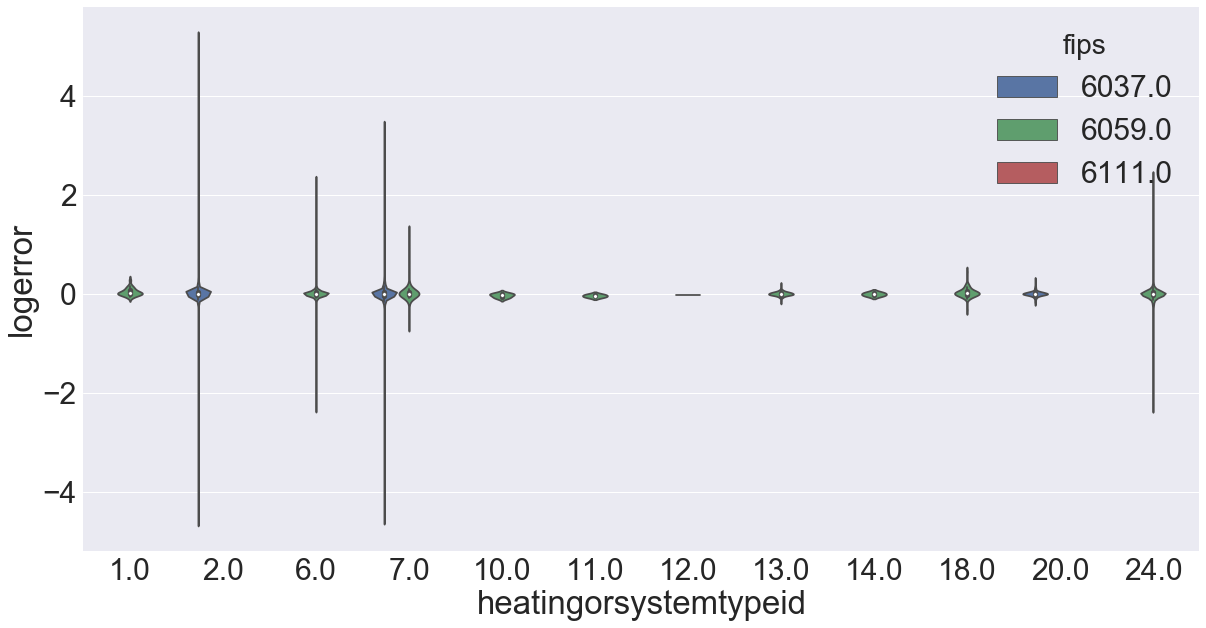

In [43]:
plt.close('all')
plt.figure(figsize=(20,10))
sns.set(font_scale = 3)
sns.violinplot(x='heatingorsystemtypeid', y='logerror', data=df_heatingorsystemtypeid, hue='fips',size=1)
plt.show()

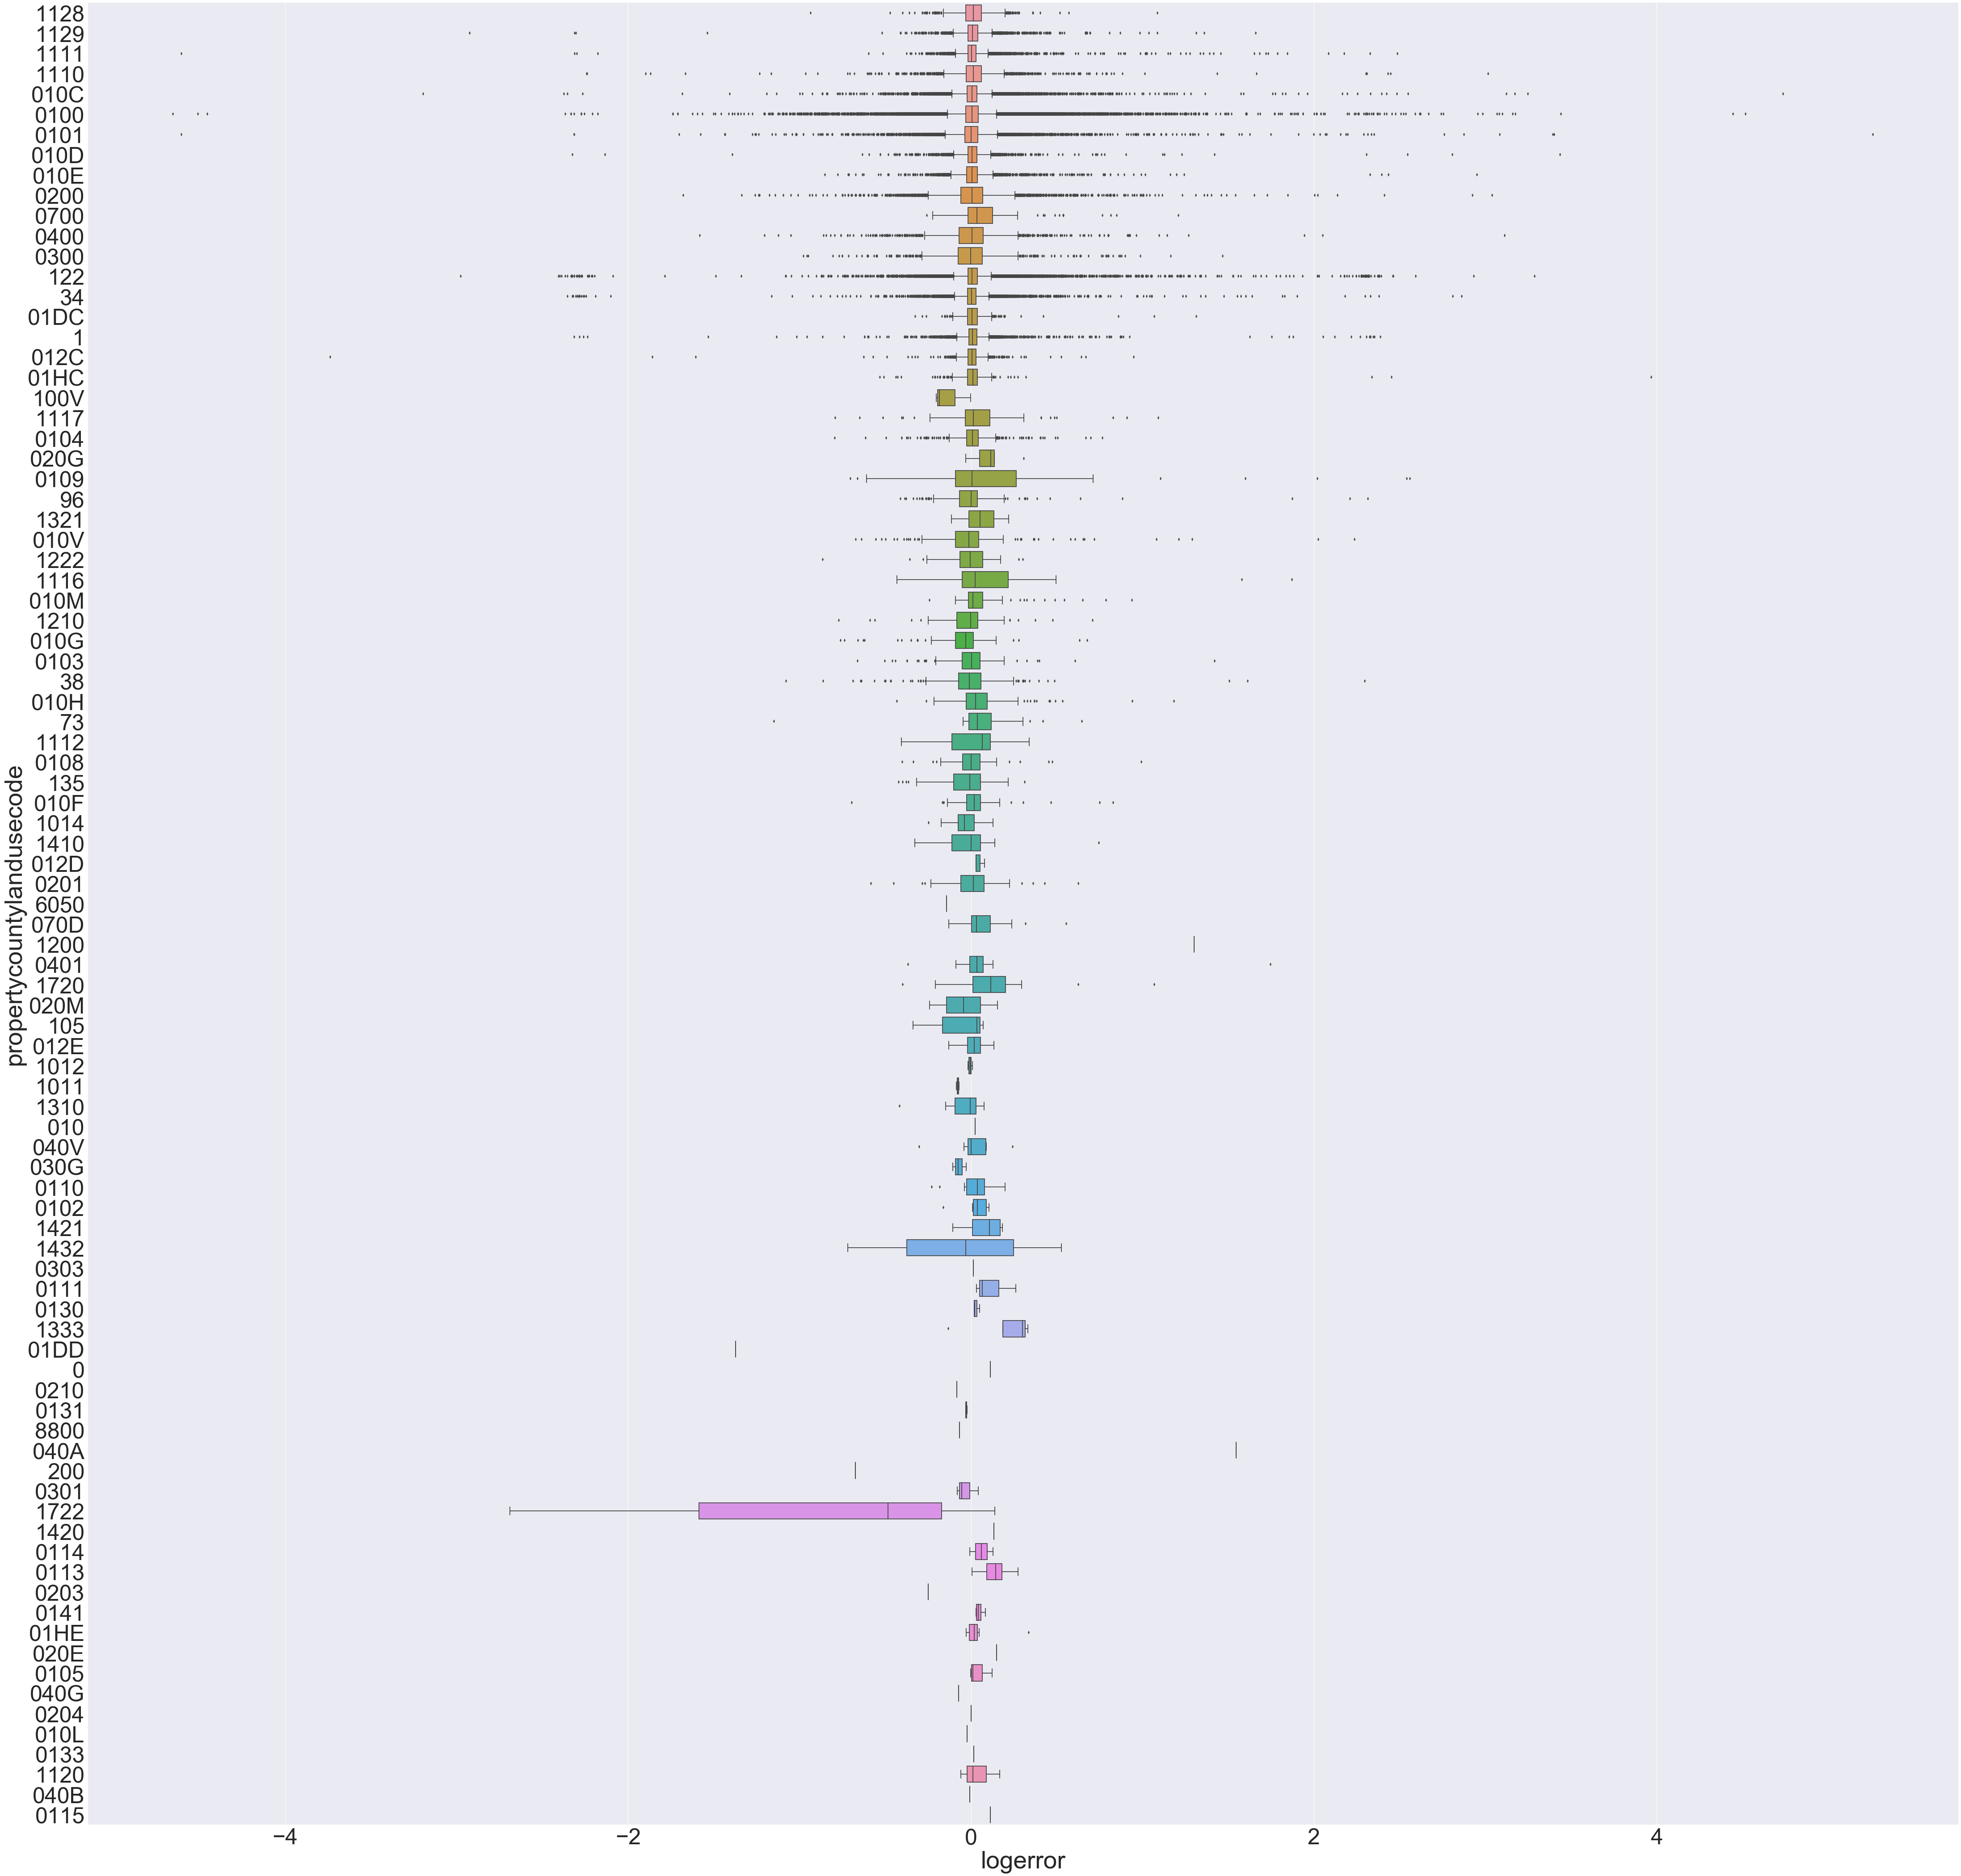

In [56]:
plt.close('all')
plt.figure(figsize=(75,75))
sns.set(font_scale = 5)
sns.boxplot(x='logerror', y='propertycountylandusecode', data=df_propertycountylandusecode)
plt.show()

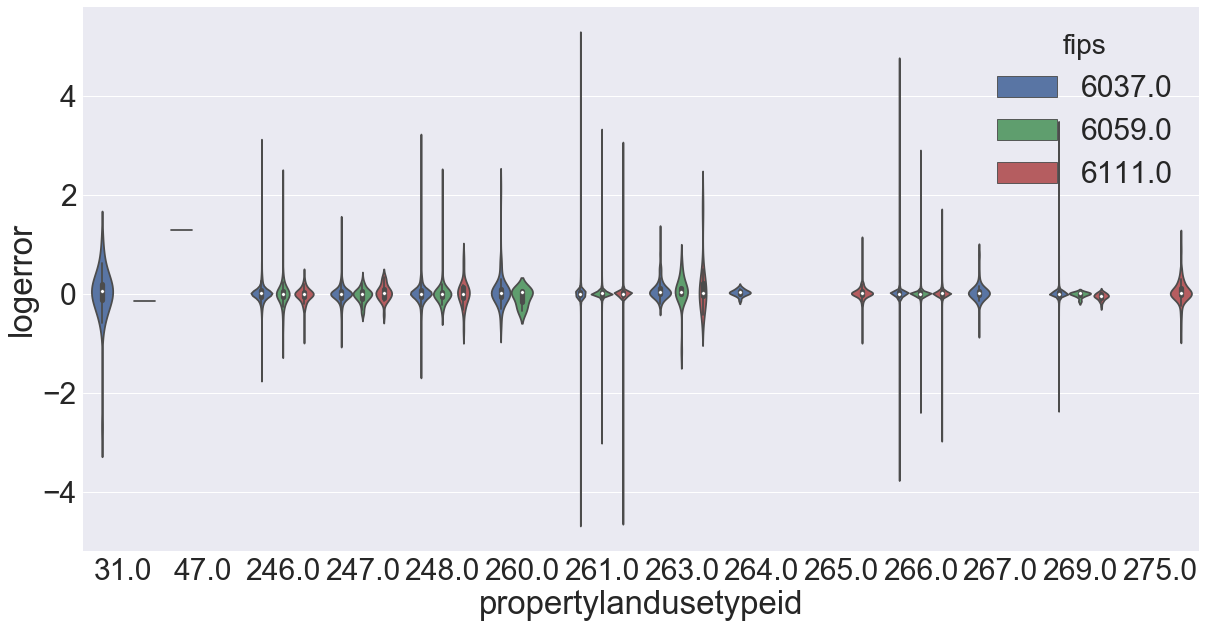

In [57]:
plt.close('all')
plt.figure(figsize=(20,10))
sns.set(font_scale = 3)
sns.violinplot(x='propertylandusetypeid', y='logerror', data=df_propertylandusetypeid, hue='fips',size=1)
plt.show()

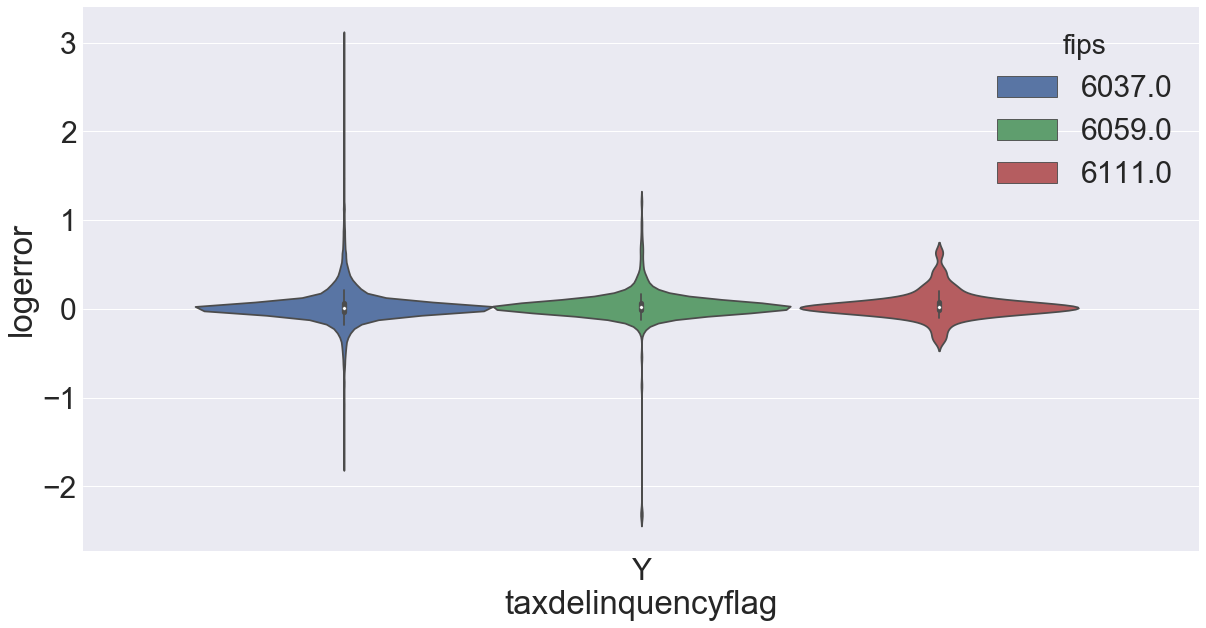

In [63]:
plt.close('all')
plt.figure(figsize=(20,10))
sns.set(font_scale = 3)
sns.violinplot(x='taxdelinquencyflag', y='logerror', data=df_taxdelinquencyflag, hue='fips',size=1)
plt.show()

### Distribution of numerical data

In [83]:
plt.close('all')
df_num.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);

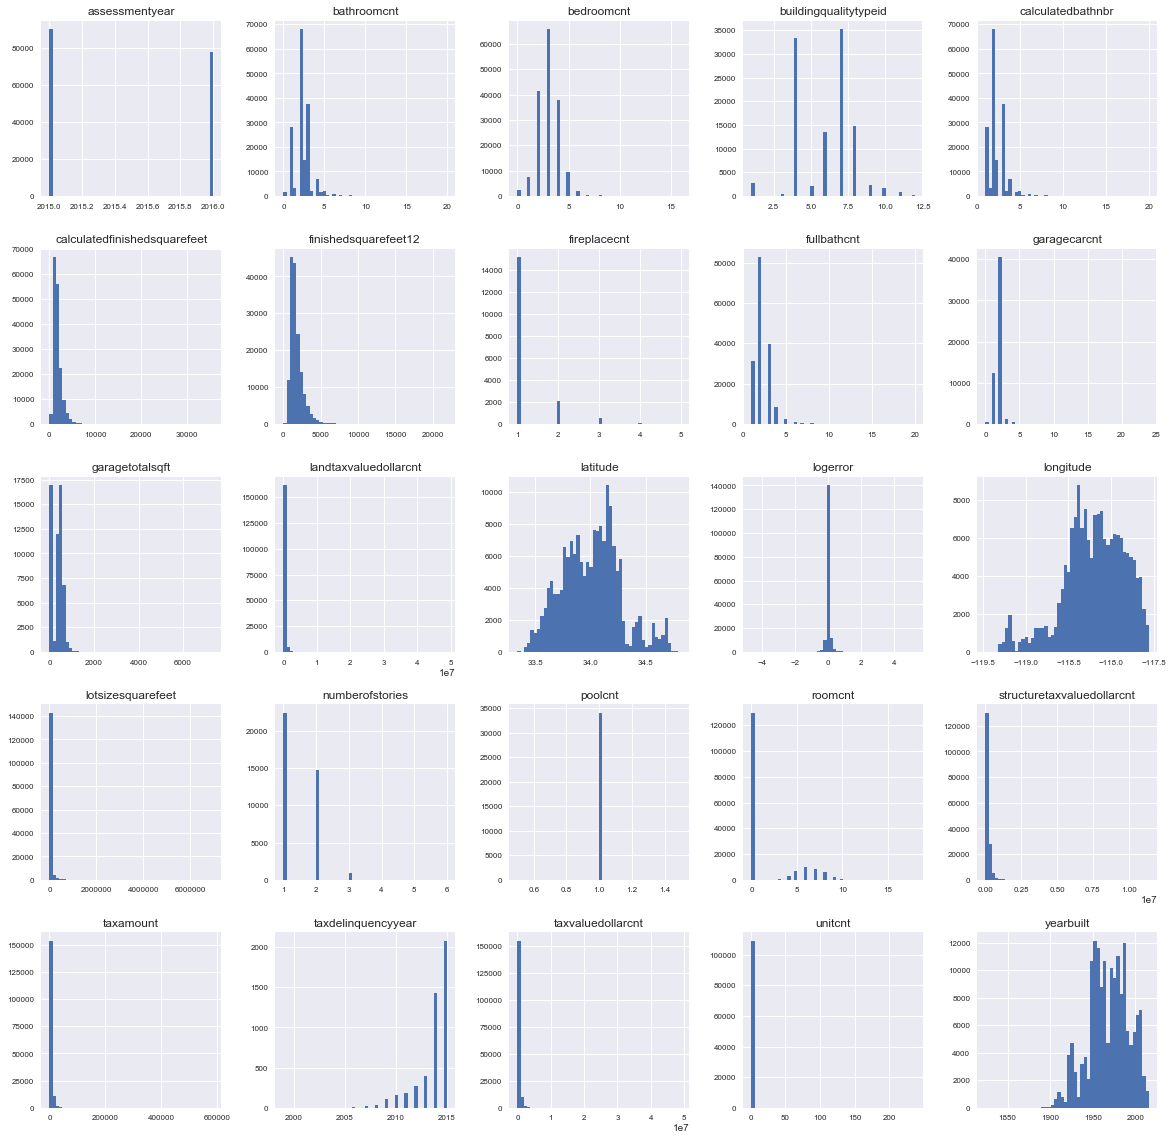

In [40]:
plt.show()

### Map plot of latitude and longitude

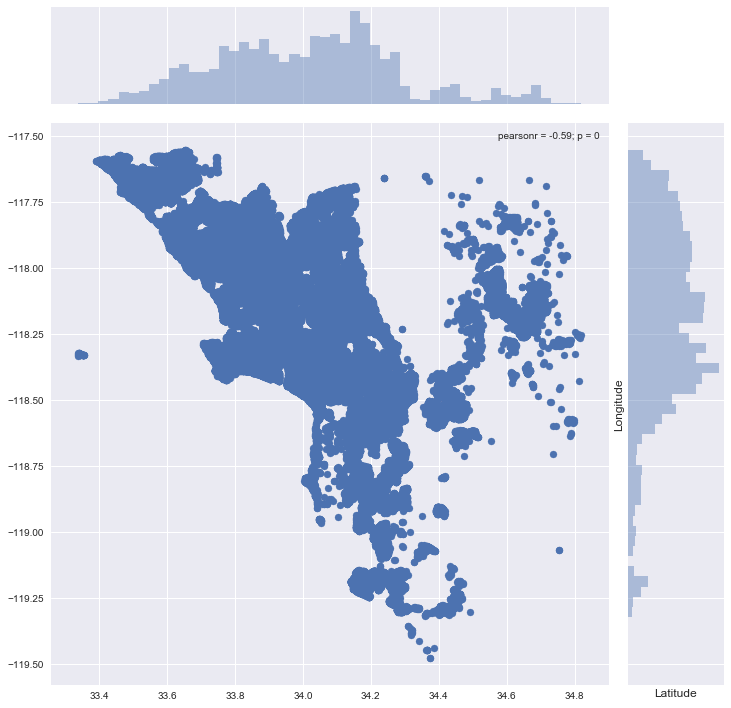

In [41]:
plt.figure(figsize=(12,12))
sns.jointplot(x=df_total.latitude.values, y=df_total.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

### Log error over various regions covered in the data

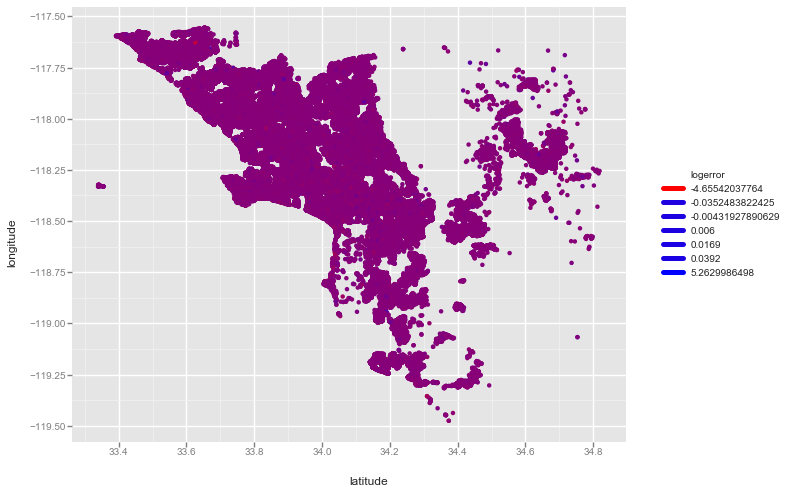

<ggplot: (144177191295)>

In [42]:
from ggplot import *
ggplot(aes(x='latitude', y='longitude', color='logerror'), data=df_total) + \
    geom_point() + \
    scale_color_gradient(low = "red",high = "blue")

### Distribution of log error

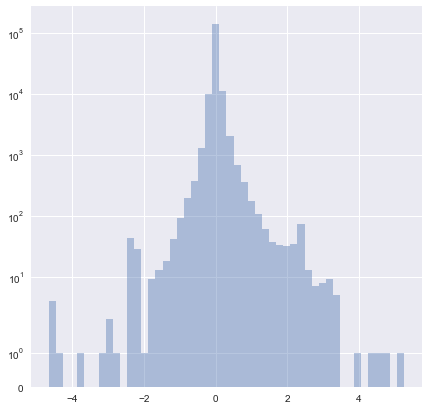

In [52]:
plt.close('all')
fig,ax=plt.subplots(figsize=(7, 7))
ax.set(yscale="symlog")
g=sns.distplot(df_num['logerror'].values, bins=50, kde=False)
#g.fig.get_axes()[0].set_yscale('log')
plt.show()